In [5]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc

### Изобразить траектории винеровского процесса.

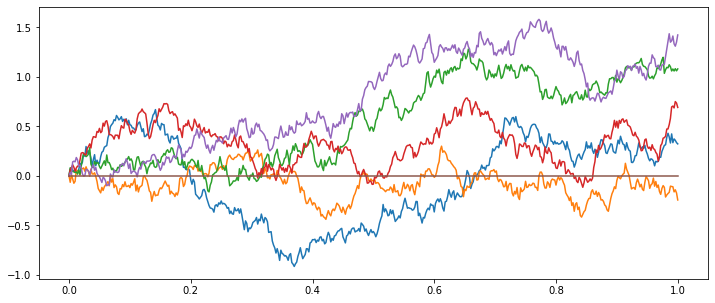

In [2]:
n = 500
plt.figure(figsize = (12,5))
x = np.linspace(0, 1, n+1)
for i in range(5):
    w = []
    w.append(0)
    for j in range(1, n + 1):
        w.append(w[j-1] + sc.norm.rvs(0,np.sqrt(x[j] - x[j-1])))
    plt.plot(x, w)
plt.plot(x, np.zeros(n+1))

### Задача 2

$P(W_t \neq 0, t \in [a, b]) = 1 - \frac{2}{\pi} arccos(\sqrt{\frac{a}{b}})$

In [16]:
def wnz(a, b, delta):
    t = np.arange(a + delta, b + delta, delta)
    delta_w = sc.norm.rvs(scale = np.sqrt(delta), size = t.size)
    w = [sc.norm.rvs(scale = np.sqrt(a))]
    for i, dw in enumerate(delta_w):
        w.append(w[i] + dw)
    return np.all(np.array(w) > 0) or np.all(np.array(w) < 0)

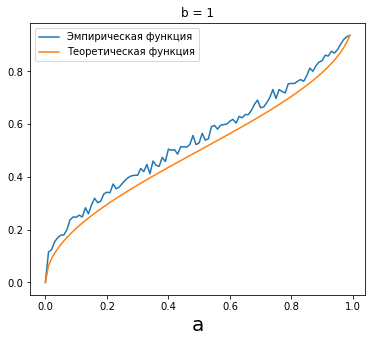

In [17]:
a = np.arange(0, 1, 0.01)
b = 1
delta = 0.01
T = 10
t = np.arange(delta, T + delta, delta)
rep = 1000
res = []
for a_ in a:
    res.append(np.mean([wnz(a_, b, delta) for i in range(rep)]))
y = 1 - 2/np.pi * np.arccos(np.sqrt(a / b))
plt.figure(figsize = (6, 5))
plt.plot(a, res)
plt.plot(a,y)
plt.xlabel("a", size = 20)
plt.legend(["Эмпирическая функция", "Теоретическая функция"])
plt.title(f'{b = }')
None

### Задача 3

$W_t = U_1+tV_{\frac{1}{t}}-V_1$

$cov(W_t, W_s) = min(t,s)$.

t > 1, s > 1, t > s.

 $cov(W_t, W_s) = cov(U_t+tV_{\frac{1}{t}}-V_1, U_s+sV_{\frac{1}{s}}-V_1) = cov(U_t, U_s) - t cov(V_{\frac{1}{t}}, V_1) - s cov(V_{\frac{1}{s}}, V_1) + cov(V_1, V_1) + ts cov(V_{\frac{1}{t}}, V_{\frac{1}{s}}) = 2s - 1$

 $cov(W_t, W_s) = cov(U_1+tV_{\frac{1}{t}}-V_1, U_1+sV_{\frac{1}{s}}-V_1) = cov(U_1, U_1) - t cov(V_{\frac{1}{t}}, V_1) - s cov(V_{\frac{1}{s}}, V_1) + cov(V_1, V_1) + ts cov(V_{\frac{1}{t}}, V_{\frac{1}{s}}) = s$

In [51]:
def wp(a, b, delta):
    t = np.arange(a+delta, b + delta, delta)
    delta_w = sc.norm.rvs(scale = np.sqrt(delta), size = t.size)
    w = [sc.norm.rvs(scale = a)]
    for i, dw in enumerate(delta_w):
        w.append(w[i] + dw)
    t = [a] + list(t)
    return t, w

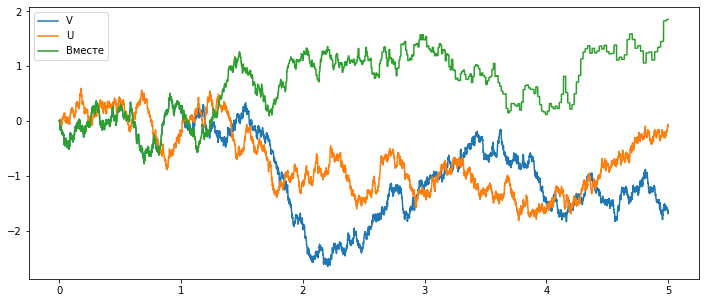

In [52]:
b = 5
delta = 0.001

time, U = wp(0, b, delta)
time, V = wp(0, b, delta)
U1 = U[time.index(1)]
V1 = V[time.index(1)]
comb = []
for i, t in enumerate(time):
    if t < 1:
        comb.append(U[i])
    else:
        t_rev = 1 / t
        for j in range(1, len(time)):
            if time[j-1] <= t_rev and t_rev <= time[j]:
                if t_rev - time[j-1] > time[j] - t_rev:
                    comb.append(U1 - V1 + t * V[j])
                else:
                    comb.append(U1 - V1 + t * V[j-1])
                break
plt.figure(figsize=(12, 5))
plt.plot(time, U)
plt.plot(time, V)
plt.plot(time, comb)
plt.legend(['V', 'U', 'Вместе'])
None